In [30]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [10]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Pandas version: 2.2.3
Numpy version: 2.2.1


In [11]:
df = pd.read_csv('train.csv')

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [13]:
df.shape

(9800, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [16]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Convetsion to Date Time

In [21]:
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

df['Ship Date'] = pd.to_datetime(
    df['Ship Date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
df = df.dropna(subset=['Order Date', 'Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [27]:
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Year'] = df['Order Date'].dt.year

## Reginol Analysis

In [31]:
region_orders = df.groupby('Region')['Order ID'].nunique().reset_index()
region_orders.columns = ['Region', 'Total_Orders']
region_orders

,Region,Total_Orders
0,Central,1156
1,East,1369
2,South,810
3,West,1587


In [32]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
region_sales

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


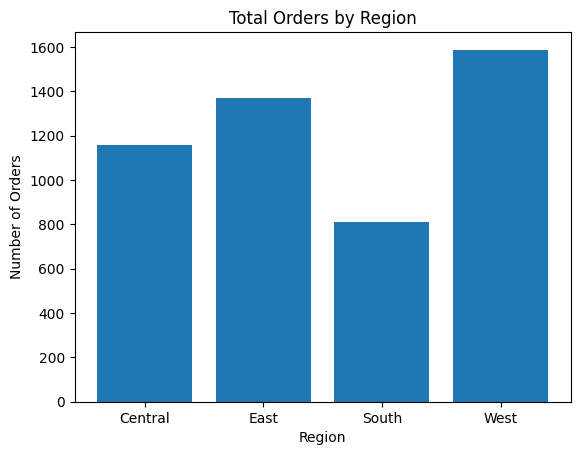

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure()
plt.bar(region_orders['Region'], region_orders['Total_Orders'])
plt.title("Total Orders by Region")
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.show()

plt.savefig("Images/total_orders_by_region.png", dpi=300)

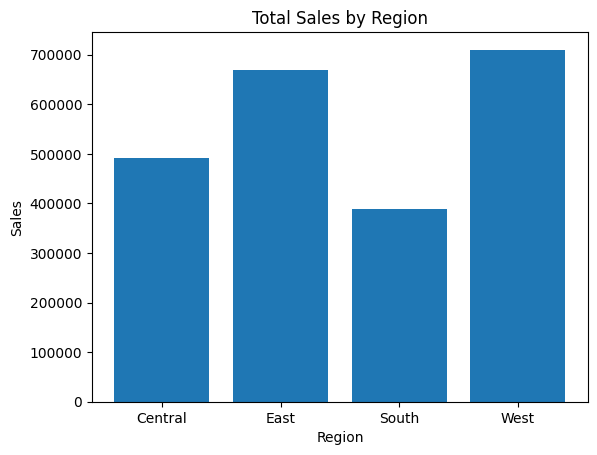

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure()
plt.bar(region_sales['Region'], region_sales['Sales'])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()


plt.savefig("Images/total_sales_by_region.png", dpi=300)

Which category is most ordered in each region?

In [35]:
region_category_orders = (
    df.groupby(['Region', 'Category'])['Order ID']
    .nunique()
    .reset_index()
)

In [36]:
top_category_per_region = (
    region_category_orders
    .sort_values(['Region', 'Order ID'], ascending=[True, False])
    .groupby('Region')
    .head(1)
)

top_category_per_region


,Region,Category,Order ID
1,Central,Office Supplies,865
4,East,Office Supplies,1048
7,South,Office Supplies,613
10,West,Office Supplies,1150


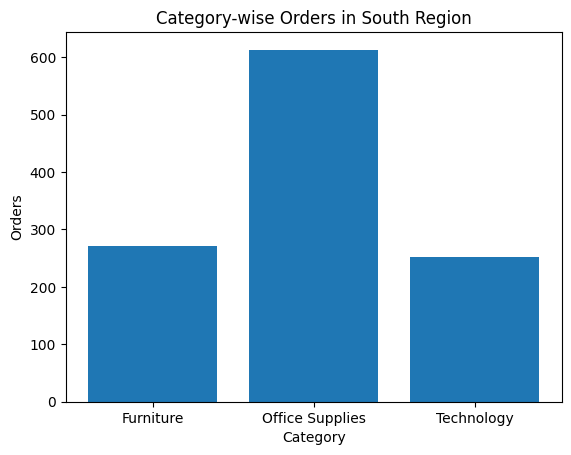

<Figure size 640x480 with 0 Axes>

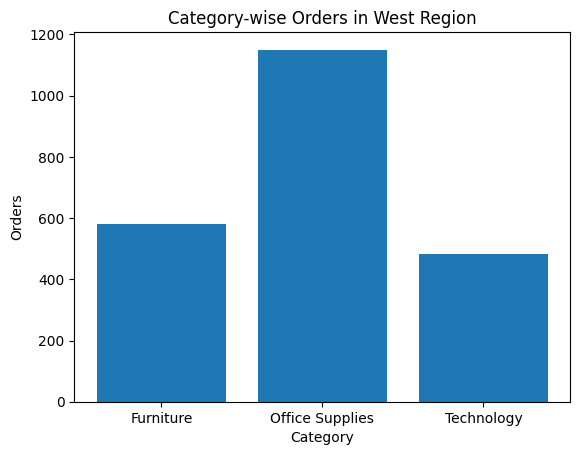

<Figure size 640x480 with 0 Axes>

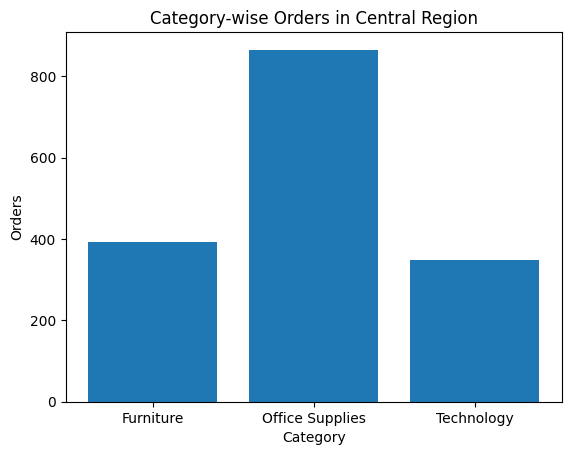

<Figure size 640x480 with 0 Axes>

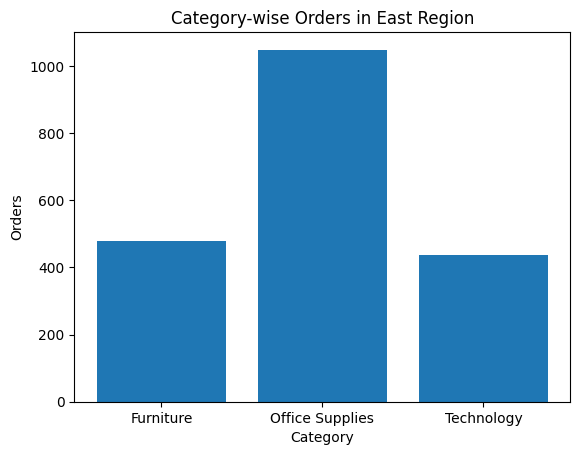

<Figure size 640x480 with 0 Axes>

In [72]:
for region in df['Region'].unique():
    subset = region_category_orders[region_category_orders['Region'] == region]
    plt.figure()
    plt.bar(subset['Category'], subset['Order ID'])
    plt.title(f"Category-wise Orders in {region} Region")
    plt.xlabel("Category")
    plt.ylabel("Orders")
    plt.show()
    plt.savefig(f"Images/category_orders_{region.lower()}.png", dpi=300)    


What is the most ordered sub-category in each region?

In [41]:
region_subcat_orders = (
    df.groupby(['Region', 'Sub-Category'])['Order ID']
    .nunique()
    .reset_index()
)
region_subcat_orders

,Region,Sub-Category,Order ID
0,Central,Accessories,165
1,Central,Appliances,118
2,Central,Art,164
3,Central,Binders,314
4,Central,Bookcases,48
...,...,...,...
63,West,Paper,374
64,West,Phones,253
65,West,Storage,244
66,West,Supplies,66


In [39]:
top_subcat_region = (
    region_subcat_orders
    .sort_values(['Region', 'Order ID'], ascending=[True, False])
    .groupby('Region')
    .head(3)
)

top_subcat_region


,Region,Sub-Category,Order ID
3,Central,Binders,314
12,Central,Paper,275
14,Central,Storage,186
20,East,Binders,374
29,East,Paper,323
26,East,Furnishings,250
37,South,Binders,206
46,South,Paper,191
43,South,Furnishings,146
54,West,Binders,397


Region-wise Monthly Activity

In [40]:
region_monthly_sales = (
    df.groupby(['Region', 'Order_Year', 'Order_Month'])['Sales']
    .sum()
    .reset_index()
)
region_monthly_sales

,Region,Order_Year,Order_Month,Sales
0,Central,2015,1,1533.966
1,Central,2015,2,1233.174
2,Central,2015,3,5827.602
3,Central,2015,4,3712.340
4,Central,2015,5,4044.522
...,...,...,...,...
187,West,2018,8,25471.374
188,West,2018,9,27107.217
189,West,2018,10,21203.092
190,West,2018,11,28718.207


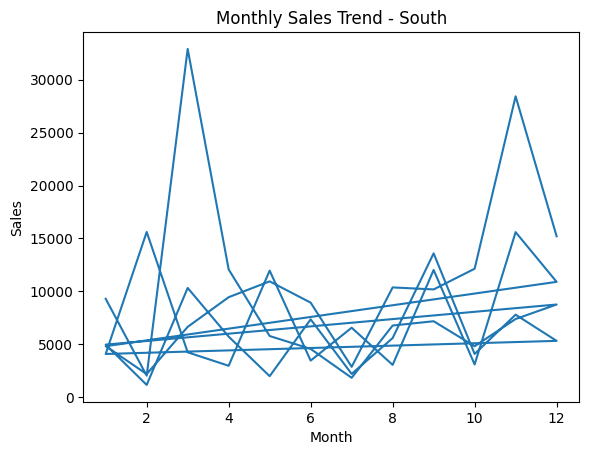

<Figure size 640x480 with 0 Axes>

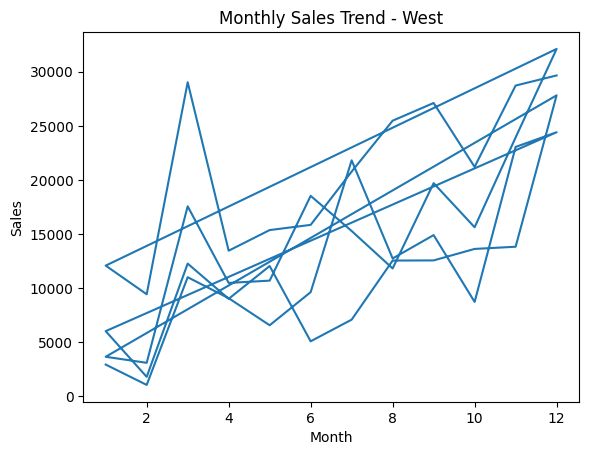

<Figure size 640x480 with 0 Axes>

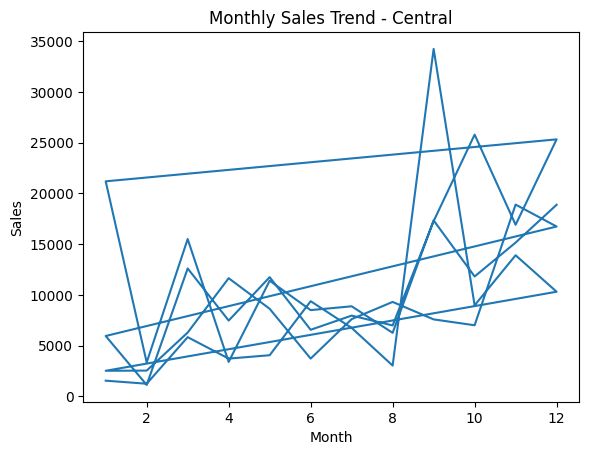

<Figure size 640x480 with 0 Axes>

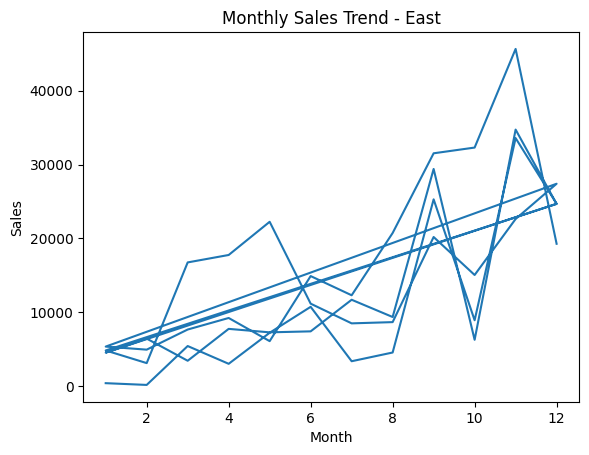

<Figure size 640x480 with 0 Axes>

In [73]:
for region in df['Region'].unique():
    subset = region_monthly_sales[region_monthly_sales['Region'] == region]
    plt.figure()
    plt.plot(subset['Order_Month'], subset['Sales'])
    plt.title(f"Monthly Sales Trend - {region}")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.show()

    plt.savefig(f"Images/monthly_sales_trend_{region.lower()}.png", dpi=300)

Delivery Efficiency by Region


In [43]:
region_delivery = (
    df.groupby('Region')['Delivery_Days']
    .mean()
    .reset_index()
)

region_delivery


,Region,Delivery_Days
0,Central,4.065876
1,East,3.910233
2,South,3.961202
3,West,3.930255


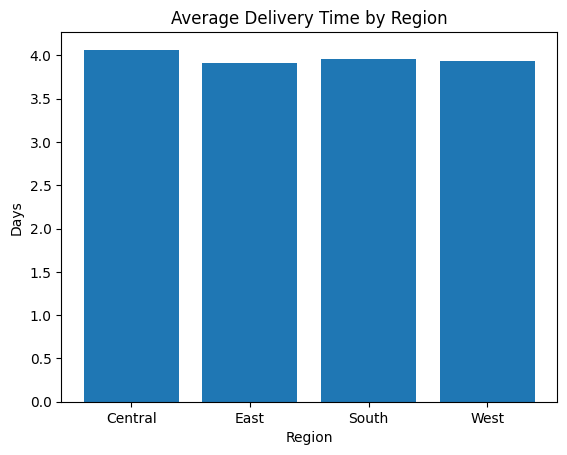

In [74]:
plt.figure()
plt.bar(region_delivery['Region'], region_delivery['Delivery_Days'])
plt.title("Average Delivery Time by Region")
plt.xlabel("Region")
plt.ylabel("Days")
plt.savefig("Images/average_delivery_time_by_region.png", dpi=300)
plt.show()


Which region has the highest average order value?

In [ ]:
region_aov = (
    df.groupby('Region')['Sales']
    .mean()
    .reset_index()
)

region_aov


,Region,Sales
0,Central,216.357889
1,East,240.401697
2,South,243.524067
3,West,226.184613


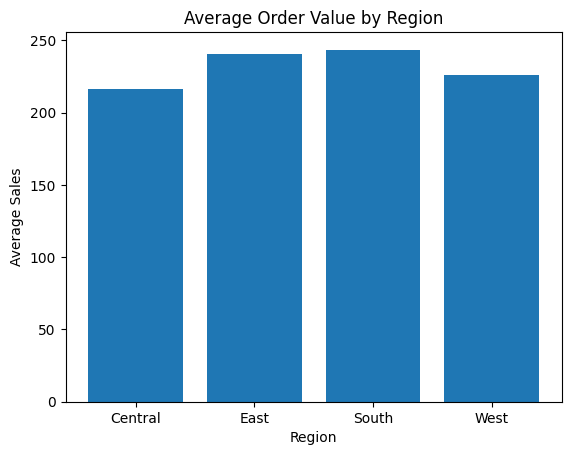

In [75]:
plt.figure()
plt.bar(region_aov['Region'], region_aov['Sales'])
plt.title("Average Order Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Sales")
plt.savefig("Images/average_order_value_by_region.png", dpi=300)
plt.show()

## City Level Analysis

Top Cities by Number of Orders (Most Active Cities)

In [48]:
city_orders = (
    df.groupby('City')['Order ID']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

top_cities_orders = city_orders.head(10)
top_cities_orders

,City,Order ID
0,New York City,439
1,Los Angeles,378
2,Philadelphia,262
3,San Francisco,261
4,Seattle,210
5,Houston,186
6,Chicago,166
7,Columbus,110
8,San Diego,88
9,Dallas,79


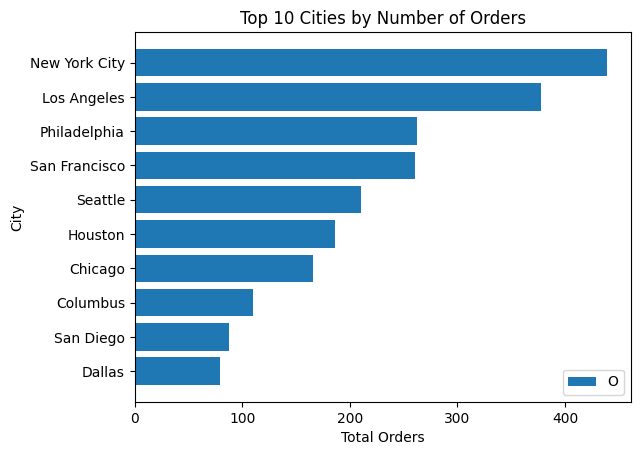

In [76]:
plt.figure()
plt.barh(top_cities_orders['City'], top_cities_orders['Order ID'])
plt.gca().invert_yaxis()
plt.title("Top 10 Cities by Number of Orders")
plt.xlabel("Total Orders")
plt.ylabel("City")
plt.legend("Orders")
plt.savefig("Images/top_10_cities_by_orders.png", dpi=300)
plt.show()

Top Cities by Total Sales (Revenue Hubs)

In [51]:
city_sales = (
    df.groupby('City')['Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_cities_sales = city_sales.head(10)
top_cities_sales


,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


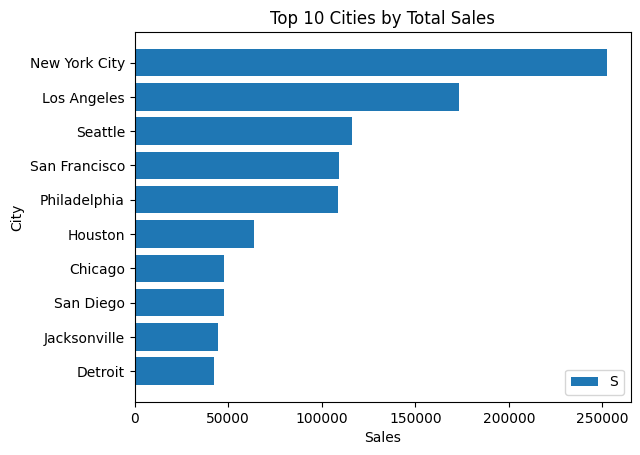

In [77]:
plt.figure()
plt.barh(top_cities_sales['City'], top_cities_sales['Sales'])
plt.gca().invert_yaxis()
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Sales")
plt.ylabel("City")
plt.legend("Sales")
plt.savefig("Images/top_10_cities_by_sales.png", dpi=300)
plt.show()


City-wise Average Order Value (Quality vs Quantity)

In [53]:
city_aov = (
    df.groupby('City')['Sales']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

top_city_aov = city_aov.head(10)
top_city_aov


,City,Sales
0,Jamestown,2354.395000
1,Cheyenne,1603.136000
2,Bellingham,1263.413333
3,Independence,1208.685000
4,Burbank,1082.386000
5,Buffalo,906.349600
6,Burlington,866.723280
7,Beverly,861.063333
8,Lafayette,860.147586
9,Sparks,853.986667


Top Categories in Top Cities

In [54]:
top_5_cities = top_cities_orders['City'].head(5)

city_category = (
    df[df['City'].isin(top_5_cities)]
    .groupby(['City', 'Category'])['Order ID']
    .nunique()
    .reset_index()
)


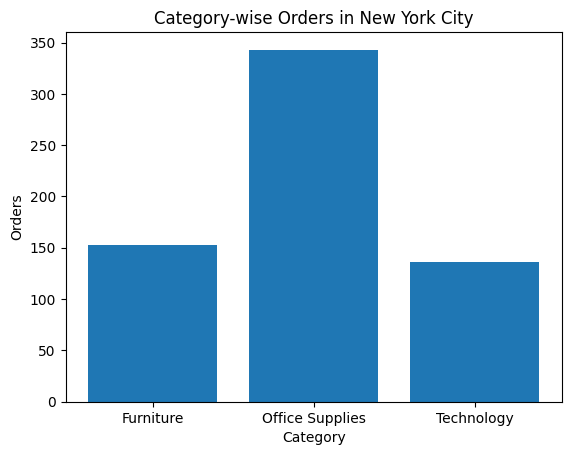

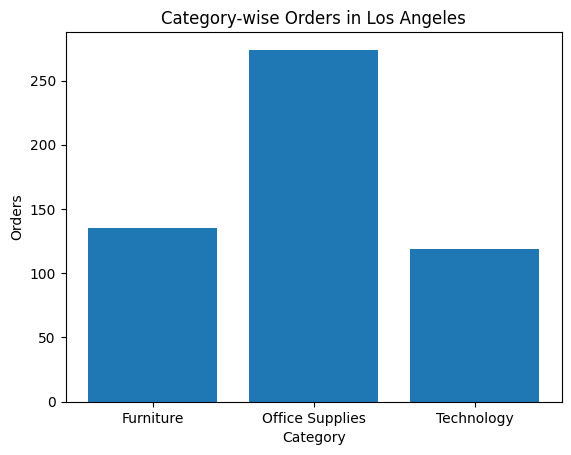

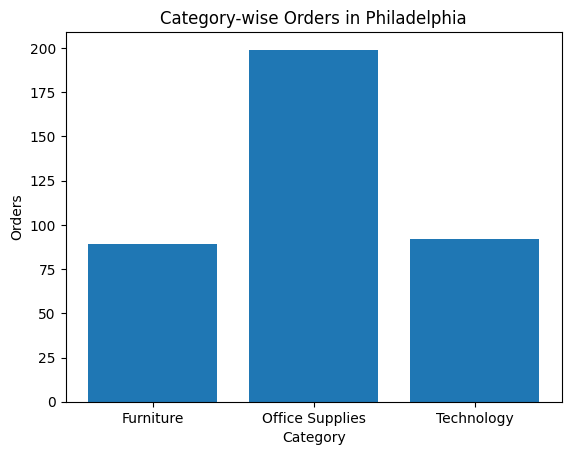

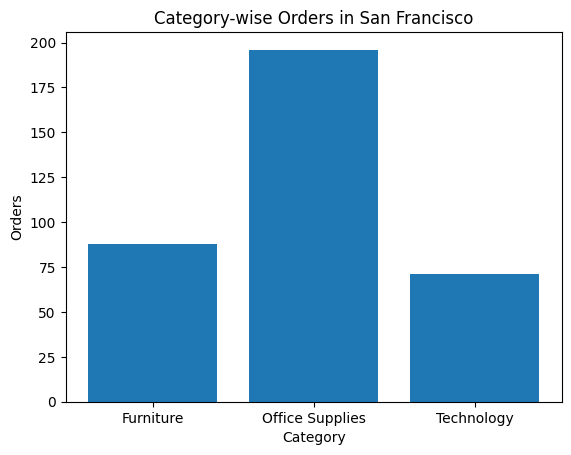

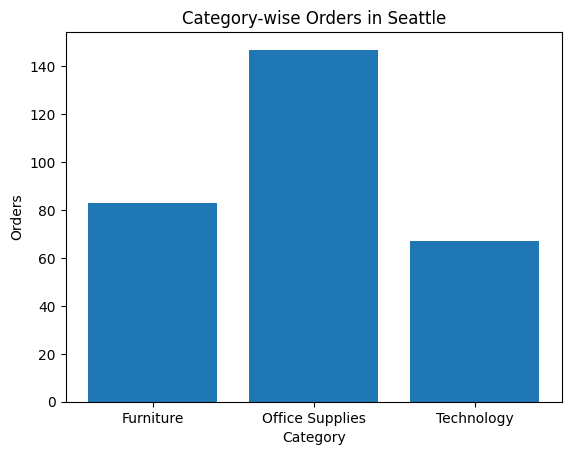

In [78]:
for city in top_5_cities:
    subset = city_category[city_category['City'] == city]
    plt.figure()
    plt.bar(subset['Category'], subset['Order ID'])
    plt.title(f"Category-wise Orders in {city}")
    plt.xlabel("Category")
    plt.ylabel("Orders")
    plt.savefig(f"Images/category_orders_{city.lower().replace(' ', '_')}.png", dpi=300)
    plt.show()


Region → City Contribution

In [56]:
region_city_sales = (
    df.groupby(['Region', 'City'])['Sales']
    .sum()
    .reset_index()
)
region_city_sales

,Region,City,Sales
0,Central,Aberdeen,25.5000
1,Central,Abilene,1.3920
2,Central,Allen,290.2060
3,Central,Amarillo,3773.0628
4,Central,Ann Arbor,889.2730
...,...,...,...
575,West,Westminster,3583.4860
576,West,Whittier,444.7680
577,West,Woodland,264.6620
578,West,Yucaipa,50.8000


In [57]:
top_city_per_region = (
    region_city_sales
    .sort_values(['Region', 'Sales'], ascending=[True, False])
    .groupby('Region')
    .head(3)
)

top_city_per_region


,Region,City,Sales
75,Central,Houston,63956.1428
27,Central,Chicago,47820.1330
44,Central,Detroit,42446.9440
253,East,New York City,252462.5470
263,East,Philadelphia,108841.7490
254,East,Newark,28448.0490
344,South,Jacksonville,44713.1830
293,South,Atlanta,17197.8400
397,South,Springfield,16628.5300
491,West,Los Angeles,173420.1810


Delivery Efficiency: City Comparison

In [58]:
city_delivery = (
    df.groupby('City')['Delivery_Days']
    .mean()
    .sort_values()
    .reset_index()
)

city_delivery.head(10)


,City,Delivery_Days
0,Billings,0.000000
1,Portage,0.000000
2,Rock Hill,0.000000
3,Bryan,0.000000
4,Mentor,0.000000
5,Kenner,0.000000
6,Utica,0.571429
7,The Colony,0.666667
8,Lansing,0.750000
9,Redlands,0.875000


## Delivery

Delivery Time vs Sales (Scatter)

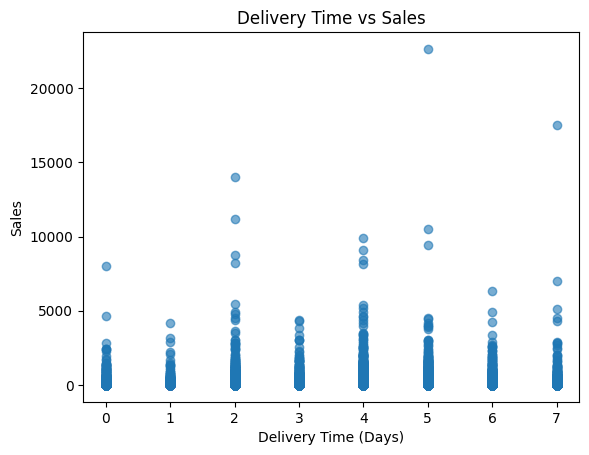

<Figure size 640x480 with 0 Axes>

In [79]:
plt.figure()
plt.scatter(df['Delivery_Days'], df['Sales'], alpha=0.6)
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Sales")
plt.title("Delivery Time vs Sales")
plt.show()
plt.savefig("Images/delivery_time_vs_sales.png", dpi=300)

In [60]:
delivery_sales = (
    df.groupby('Delivery_Days')['Sales']
    .mean()
    .reset_index()
)


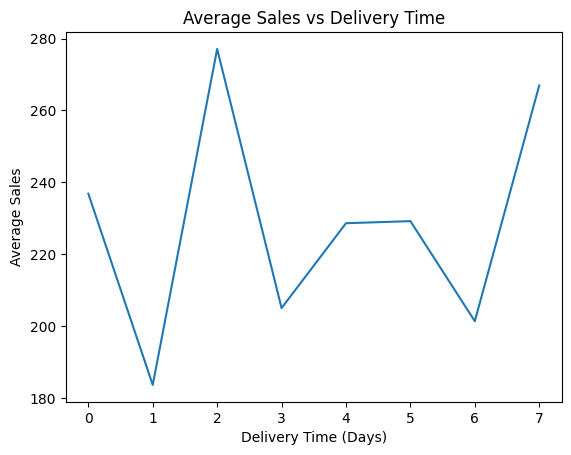

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure()
plt.plot(delivery_sales['Delivery_Days'], delivery_sales['Sales'])
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Average Sales")
plt.title("Average Sales vs Delivery Time")
plt.show()
plt.savefig("Images/average_sales_vs_delivery_time.png", dpi=300)


Delivery Time Buckets

In [62]:
df['Delivery_Bucket'] = pd.cut(
    df['Delivery_Days'],
    bins=[0, 2, 5, 10, 30],
    labels=['Fast (0–2)', 'Medium (3–5)', 'Slow (6–10)', 'Very Slow (>10)']
)

In [63]:
bucket_sales = (
    df.groupby('Delivery_Bucket')['Sales']
    .mean()
    .reset_index()
)
bucket_sales


C:\Users\Dell\AppData\Local\Temp\ipykernel_5240\2018121456.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Delivery_Bucket')['Sales']


,Delivery_Bucket,Sales
0,Fast (0–2),256.666972
1,Medium (3–5),224.941822
2,Slow (6–10),224.024802
3,Very Slow (>10),NaN


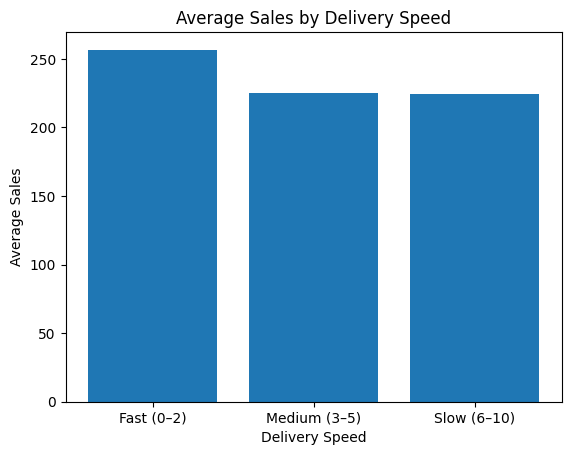

In [83]:
plt.figure()
plt.bar(bucket_sales['Delivery_Bucket'], bucket_sales['Sales'])
plt.xlabel("Delivery Speed")
plt.ylabel("Average Sales")
plt.title("Average Sales by Delivery Speed")
plt.savefig("Images/average_sales_by_delivery_speed.png", dpi=300)
plt.show()


Delivery Time vs Sales (Region-wise Comparison)

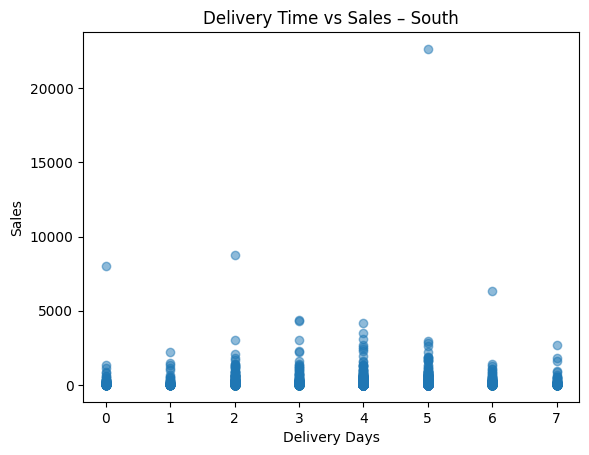

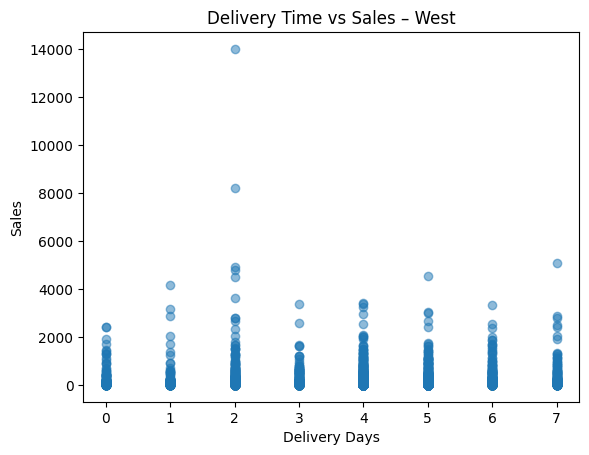

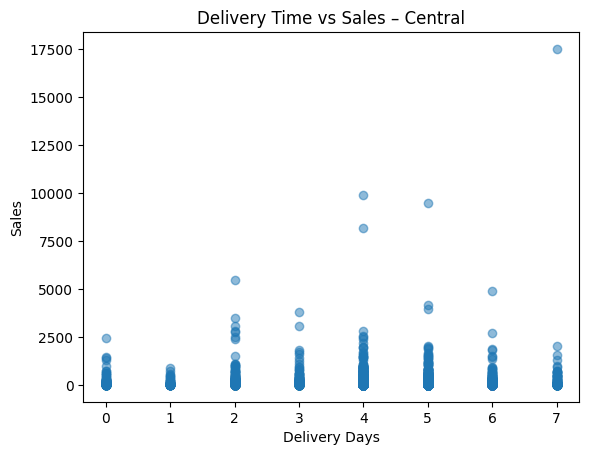

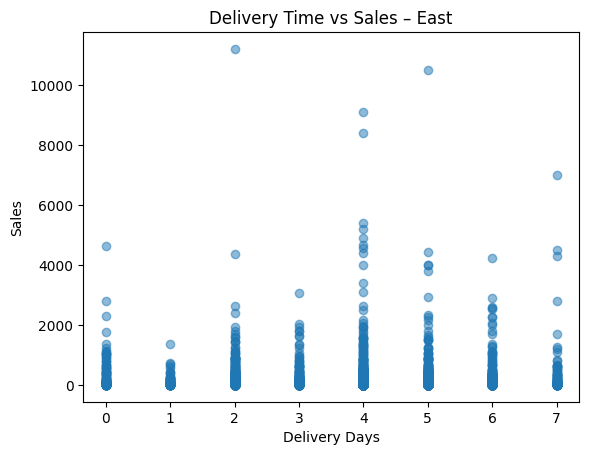

In [82]:
for region in df['Region'].unique():
    subset = df[df['Region'] == region]
    plt.figure()
    plt.scatter(subset['Delivery_Days'], subset['Sales'], alpha=0.5)
    plt.title(f"Delivery Time vs Sales – {region}")
    plt.xlabel("Delivery Days")
    plt.ylabel("Sales")
    plt.savefig(f"Images/delivery_time_vs_sales_{region.lower()}.png", dpi=300)
    plt.show()


Delivery Time Distribution (Data Quality Check)

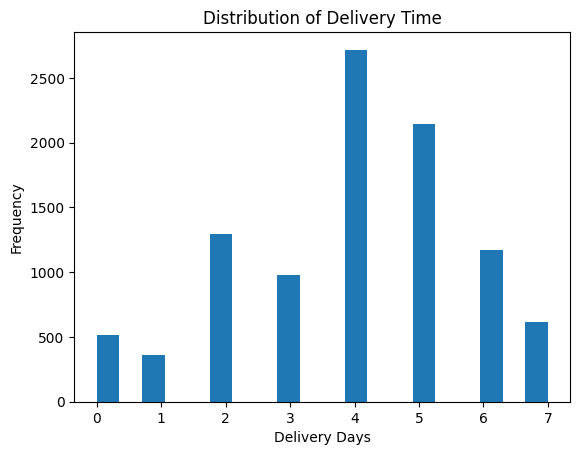

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure()
plt.hist(df['Delivery_Days'], bins=20)
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()
plt.savefig("Images/distribution_of_delivery_time.png", dpi=300)


In [67]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery_Days,Order_Month,Order_Year,Delivery_Bucket
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,11,2017,Medium (3–5)
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,11,2017,Medium (3–5)
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,6,2017,Medium (3–5)
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,10,2016,Slow (6–10)
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,10,2016,Slow (6–10)


In [69]:
df.to_csv("superstore_eda_cleaned.csv", index=False)
print("Cleaned data saved to 'superstore_eda_cleaned.csv'")

Cleaned data saved to 'superstore_eda_cleaned.csv'
